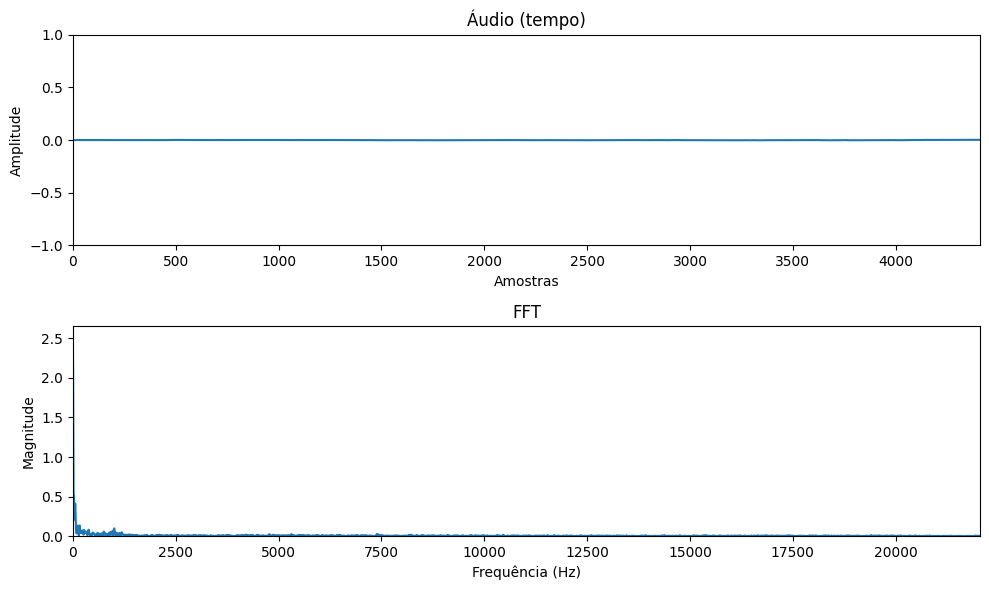

Encerrando...


In [13]:
%matplotlib inline

import numpy as np
import time
import sys
import FFT
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy.io.wavfile as wav


SAMPLERATE = 44.1e3
DURATION = 0.1
FRAMES = int(DURATION*SAMPLERATE)

stream = sd.InputStream(samplerate=SAMPLERATE, channels=1, dtype='float32', blocksize=int(FRAMES))
stream.start()


# ==== FUNÇÃO DE ATUALIZAÇÃO ====
def update():
    audio, _ = stream.read(FRAMES)
    audio = audio.flatten()

    # FFT com janela de Hanning
    windowed = audio * np.hanning(len(audio))
    X = FFT.fft_completa(windowed)

    freqs = FFT.frequencia(SAMPLERATE,X)
    # threshold = 5 # ajuste conforme necessário (teste!)
    magnitude = np.abs(X[0:len(X)//2])

    return audio, magnitude, freqs

# ===== CONFIGURAÇÃO DO GRÁFICO =====
plt.ion()  # modo interativo
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))

# Áudio no tempo
line_audio, = ax1.plot(np.zeros(FRAMES))
ax1.set_ylim(-1, 1)
ax1.set_xlim(0, FRAMES)
ax1.set_title("Áudio (tempo)")
ax1.set_xlabel("Amostras")
ax1.set_ylabel("Amplitude")

# FFT
line_fft, = ax2.plot(np.zeros(FRAMES//2))
ax2.set_ylim(0, 50)  # valor inicial; será atualizado dinamicamente
ax2.set_xlim(0, SAMPLERATE/2)
ax2.set_title("FFT")
ax2.set_xlabel("Frequência (Hz)")
ax2.set_ylabel("Magnitude")

plt.tight_layout()

# ===== LOOP PRINCIPAL =====
try:
    while True:
        audio, magnitude, freqs = update()

        # Atualiza áudio
        line_audio.set_ydata(audio)

        # Atualiza FFT
        line_fft.set_ydata(magnitude)
        line_fft.set_xdata(freqs)
        ax2.set_ylim(0, np.max(magnitude)*1.1)  # ajusta escala dinâmica

        plt.pause(0.01)

except KeyboardInterrupt:
    print("Encerrando...")
    stream.stop()
    stream.close()
